# FIFA 2019 Exploratory Analysis

Greetings! I welcome whoever is checking this out to step into the world of International Football. Today, we will be going over an analysis of FIFA 19, diving into the individual skills of some of the top football players in the world, the money invested in these players, and the analytics involved to show  one of the top Clubs what their next big move should be. 

First, let's take a look at some of the data we have to offer.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

cwd = os.getcwd()
print(cwd)

#change working Directory
os.chdir(r'''C:\Users\wscott\AppData\Local\Programs\Python''')
print(cwd)


C:\Users\wscott\AppData\Local\Programs\Python
C:\Users\wscott\AppData\Local\Programs\Python


In [3]:
#Opens up the CSV file in my working directory 
#and stores dataframe in a variable
df = pd.read_csv('Fifa19_Data.csv')

#Prints out the first 1 rows of our Dataframe
print(df.head(1))

   Unnamed: 0      ID      Name  Age  \
0           0  158023  L. Messi   31   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   

                                  Flag  Overall  Potential          Club  ...  \
0  https://cdn.sofifa.org/flags/52.png       94         94  FC Barcelona  ...   

  Composure Marking StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      96.0    33.0           28.0           26.0      6.0        11.0   

   GKKicking  GKPositioning GKReflexes Release Clause  
0       15.0           14.0        8.0        €226.5M  

[1 rows x 89 columns]


So that all looks a bit messy, but now we have a general idea of what kind of data we have. There are some descriptive traits like player's name, age, and nationality as well as specific numeric traits like composure, slide tackling, and goal kicking ability. 

Let's get a better description of all the different columns this dataset has to offer.

In [7]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Now that we have an idea of the type of data we're working with, let's do some exploring!

It would be interesting to see the distribution of ages among these players.

The Player Age Distribution has mean 25.122205745043114 and standard deviation 4.66994271341431


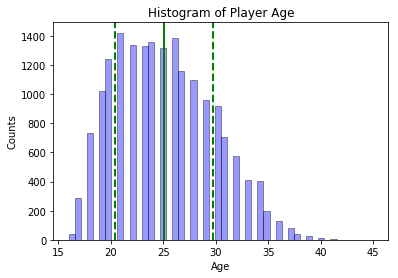

In [27]:
Age = df['Age']

sns.distplot(Age, hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.axvline(Age.mean(), color='g', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(Age.mean() + Age.std(), color='g', 
            linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(Age.mean()- Age.std(), color='g', 
            linestyle='dashed', linewidth=2) 

plt.title('Histogram of Player Age')
plt.xlabel('Age')
plt.ylabel('Counts')

print('The Distribution Players by Age has mean {} and standard deviation {}'.format( Age.mean(), Age.std()))

Looks like the data is relatively centralized at 25 with most players between 20 and 30. 

It's worth noting the stark similarity to the Poisson Distribution. This is not terribly surprising, as the Poisson represents a decaying function. With time, players age and their skills start to deteriorate. If skills start to dwain, the will lose value, and eventually will retire or won't be resigned!

With the hypothesis that skill begins to deteriorate over time, let's analyze the Overall Skill attribute in the dataset against the players age.

Text(0, 0.5, 'Overall Skill')

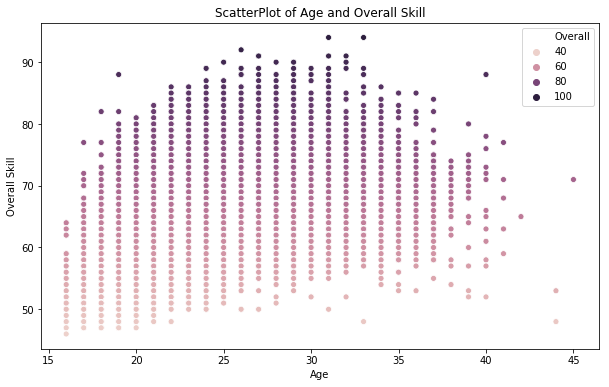

In [29]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="Age", y='Overall', data=df, hue='Overall') 

plt.title('ScatterPlot of Age and Overall Skill')
plt.xlabel('Age')
plt.ylabel('Overall Skill')

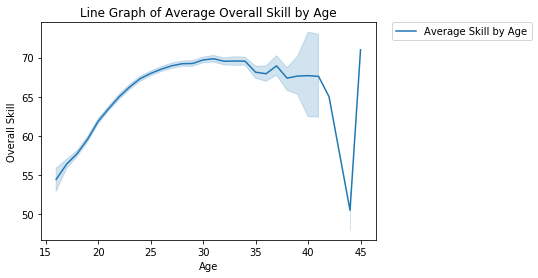

In [31]:
sns.lineplot(x="Age", y="Overall", data=df, label='Average Skill by Age')

plt.title('Line Graph of Average Overall Skill by Age')
plt.xlabel('Age')
plt.ylabel('Overall Skill')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The dark blue line in the middle represents the mean Overall Skill for each age. The lighter blue boarder represents the 95% Confidence Interval. In other words, there's a 95% probability that if this data is a sample of a larger population, the true mean will be within this interval.

The next curiosity that comes to mind is what is the age range that sees the greatest increase in Overall Skill. #A better way to describe this mathematically, what age range has the largest (positive) line tangent to the curve.#

The best way to do this would be to group the data frame by Age, finding each age's mean.

In [33]:
Age_Overall = df[['Overall', 'Age']].groupby('Age').mean()

print(Age_Overall)

       Overall
Age           
16   54.452381
17   56.404844
18   57.741803
19   59.583008
20   61.858871
21   63.480675
22   64.994030
23   66.244745
24   67.306333
25   67.973465
26   68.514780
27   68.949225
28   69.213442
29   69.246090
30   69.695747
31   69.850071
32   69.529617
33   69.558824
34   69.539604
35   68.132653
36   67.937008
37   68.939024
38   67.378378
39   67.640000
40   67.692308
41   67.600000
42   65.000000
44   50.500000
45   71.000000


Next, let's iterate over a 3 year age range and find the greatest (positive) difference in Overall Skill.

In [36]:
#Initialing the range for the first iteration of the for loop
top_range = 0

#For loop iterating over the age range 
#(being careful of Out of Bounds errors)
for age in range(0, Age_Overall.size - 3):
    
    #Using a boolean to check if the current Overall Skill range is better than the current top_range
    if top_range < Age_Overall.iloc[age+3].get_value('Overall') - Age_Overall.iloc[age].get_value('Overall'):
        
        #If true, set the current range, to the top_range
        top_range = Age_Overall.iloc[age+3].get_value('Overall') - Age_Overall.iloc[age].get_value('Overall')
        
        #The range starts at 0, so we must add 16 (starting age)
        Upper_Age = age+3 + 16
        Lower_Age = age + 16
        
        #Prints the different age top age ranges as they change
        print('Age Range: ' + str(Lower_Age) + '-' + str(Upper_Age))
        print('Overall Difference: ' + str(top_range))
print('The Age Range with the greatest Overall Skill increase is between {} and {} with an average increase of {}.'.format(Lower_Age,  Upper_Age, top_range))

Age Range: 16-19
Overall Difference: 5.130626860119051
Age Range: 17-20
Overall Difference: 5.454026677084499
Age Range: 18-21
Overall Difference: 5.73887135237262
The Age Range with the greatest Overall Skill increase is between 18 and 21 with an average increase of 5.73887135237262.


c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Awesome! So what this tells me is that I were to invest in a player with the hopes my club could increase his skill even further, I would look for a prospect between 18 and 21 years old.

The next thing I would like to check out is how much players are being paid on average for each position.

Unfortunately, FIFA is extremely detailed with exactly what position players prefer. So instead of just having 'D' for defence, a player could be set as a Central Defender of a Left Wing Back. Let's clean that up:

In [42]:
#df.loc[str(df.Position).find('GK') != -1, 'General_Position'] = 'GK'

df.loc[df.Position=='GK', 'General_Position'] = 'GK'

df.loc[df.Position=='LB', 'General_Position'] = 'D'
df.loc[df.Position=='LCB', 'General_Position'] = 'D'
df.loc[df.Position=='LWB', 'General_Position'] = 'D'

df.loc[df.Position=='RB', 'General_Position'] = 'D'
df.loc[df.Position=='RCB', 'General_Position'] = 'D'
df.loc[df.Position=='RWB', 'General_Position'] = 'D'

df.loc[df.Position=='CB', 'General_Position'] = 'D'

df.loc[df.Position=='CAM', 'General_Position'] = 'M'
df.loc[df.Position=='CDM', 'General_Position'] = 'M'
df.loc[df.Position=='CM', 'General_Position'] = 'M'

df.loc[df.Position=='LAM', 'General_Position'] = 'M'
df.loc[df.Position=='LCM', 'General_Position'] = 'M'
df.loc[df.Position=='LDM', 'General_Position'] = 'M'
df.loc[df.Position=='LM', 'General_Position'] = 'M'
df.loc[df.Position=='LW', 'General_Position'] = 'M'

df.loc[df.Position=='RAM', 'General_Position'] = 'M'
df.loc[df.Position=='RCM', 'General_Position'] = 'M'
df.loc[df.Position=='RDM', 'General_Position'] = 'M'
df.loc[df.Position=='RM', 'General_Position'] = 'M'
df.loc[df.Position=='RW', 'General_Position'] = 'M'

df.loc[df.Position=='RF', 'General_Position'] = 'F'
df.loc[df.Position=='RS', 'General_Position'] = 'F'
df.loc[df.Position=='LF', 'General_Position'] = 'F'
df.loc[df.Position=='LS', 'General_Position'] = 'F'
df.loc[df.Position=='CF', 'General_Position'] = 'F'
df.loc[df.Position=='ST', 'General_Position'] = 'F'

df.loc[df.Position.isnull(), 'General_Position'] = 'M'

print(df[['Name', 'Position', 'General_Position']].head(1))

       Name Position General_Position
0  L. Messi       RF                F


Looks like it worked for Messi as a Right Forward now simply considered a Forward. 

One more step we must take is converting 'Wages', a measure of weekly pay, to a useable integer:

€405K -> 405

In [43]:
#Take the Second Element of list created after split
#Ex. €405K -> ['', '405K'] -> 405K
df['Weekly_Pay'] = df['Wage'].str.rsplit('€').str[1]

#Take the First Element of list created after split
#Ex. 405K -> ['405', ''] -> 405
df['Weekly_Pay'] = df['Weekly_Pay'].str.rsplit('K').str[0]

#Converts string to integer
df['Weekly_Pay'] = df['Weekly_Pay'].astype('int64')

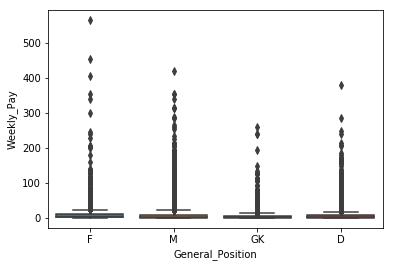

In [44]:
sns.boxplot(x='General_Position', y='Weekly_Pay', data=df)

Yikes! Looks like the upper teir players are being paid so much we can't even see the other quartiles. Well I think it would be best to look at the best players in the world anyway by filtering on Overall Skill:

In [75]:
df_Top_Positions = df[(df.Overall > 85)]

Text(0, 0.5, 'Weekly Pay in €')

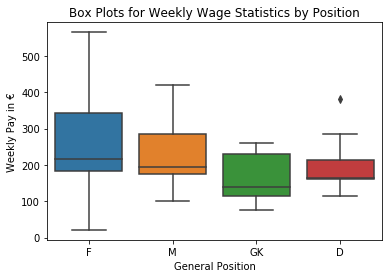

In [76]:
sns.boxplot(x='General_Position', y='Weekly_Pay', data=df_Top_Positions)

plt.title('Box Plots for Weekly Wage Statistics by Position')
plt.xlabel('General Position')
plt.ylabel('Weekly Pay in €')

From this, I now conclude that Midfielders with an Overall Skill of 80 have the highest 75% Quartile for Weekly Pay. Some of the highest paid players in the world would be considered Forwards (Messi and Ronaldo).

Because players in the midfield are the one's that see the most action in the game, it would make sense to pay these players a hefty penny to stick around. Having the best goal scorers (Strikers) are priceless, and it seems Barcelona and now Juventus will pay whatever it takes to keep them!

The last thing I would like to do is see how some players have gotten better since FIFA 2018. The best way to do that is to join the 2018 and 2019 datasets together!

First we're going to read the file, join on a particular field (ID), and add in a few columns of our choice.

In [54]:
df2 = pd.read_csv('Fifa18_Data.csv')

Joined_df = pd.merge(df,
                 df2[['ID', 'name', 'club', 'league', 'overall']],
                 on='ID')

Joined_df.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKKicking,GKPositioning,GKReflexes,Release Clause,General_Position,Weekly_Pay,name,club,league,overall
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,15.0,14.0,8.0,€226.5M,F,565,L. Messi,FC Barcelona,Spanish Primera División,93


Let's change a few column names and add a feature that tells us the player's Overall Skill change year over year.

In [57]:
Joined_df = Joined_df.rename(columns={"overall":"Previous_Overall", 
                                      "club":"Previous_Club", 'league':'League'})

Joined_df['Overall_Change'] = Joined_df.Overall - Joined_df.Previous_Overall
print(Joined_df.head(1))

   Unnamed: 0      ID      Name  Age  \
0           0  158023  L. Messi   31   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   

                                  Flag  Overall  Potential          Club  ...  \
0  https://cdn.sofifa.org/flags/52.png       94         94  FC Barcelona  ...   

  GKPositioning GKReflexes Release Clause  General_Position Weekly_Pay  \
0          14.0        8.0        €226.5M                 F        565   

       name  Previous_Club                    League Previous_Overall  \
0  L. Messi   FC Barcelona  Spanish Primera División               93   

  Overall_Change  
0              1  

[1 rows x 96 columns]


Looks like Messi has improved from 93 to 94 (I can see why he's being paid the big bucks!). What really cultivates player growth is the Club they play for.

Let's check out which teams had the greatest average improvement since 2018:

In [74]:
Club_Growth = Joined_df[['Overall', 'Previous_Overall', 'Overall_Change', 'Club', 'League']]

Club_Growth2 = Joined_df[['Overall_Change', 'Club']].groupby('Club').mean()

Liga = Club_Growth[Club_Growth.League=='Spanish Primera División']

print(Liga[['Overall_Change', 'Club', 'League']].groupby('Club').mean().sort_values('Overall_Change', ascending=False))

#print(Club_Growth2.sort_values('Overall_Change', ascending=False))

                                Overall_Change
Club                                          
Napoli                               11.000000
Crystal Palace                        7.000000
VfB Stuttgart                         6.000000
UD Almería                            5.500000
Elche CF                              5.000000
Borussia Dortmund                     4.500000
Guangzhou Evergrande Taobao FC        4.000000
Getafe CF                             3.687500
Lazio                                 3.500000
Kashiwa Reysol                        3.000000
Club Atlético Banfield                3.000000
Genoa                                 3.000000
Real Betis                            2.823529
Valencia CF                           2.238095
New York City FC                      2.000000
Chelsea                               2.000000
Wolverhampton Wanderers               2.000000
Bournemouth                           2.000000
FC Sochaux-Montbéliard                2.000000
Arsenal      